### Trabalho 1

Seguem instruções:

1) Baixar dataset em : https://www.kaggle.com/c/home-credit-default-risk/data

2) Explorar, conforme instruções:

* 'application_train.csv': Esse csv possui 122 colunas: explorar 40 colunas, sendo as primeiras 30 obrigatórias e 10 adicionais a escolher
* 30 colunas obrigatórias:

['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS']
       
* alunos deverão se organizar para que todas as colunas sejam exploradas
* escolher dois arquivos, para exploração e join/merge/concat com o 'application_train.csv'

['HomeCredit_columns_description.csv',
 'POS_CASH_balance.csv',
 'credit_card_balance.csv',
 'installments_payments.csv',
 'application_train.csv',
 'bureau.csv',
 'previous_application.csv',
 'bureau_balance.csv',
 'sample_submission.csv']
 
3) objetivos:
* entendimento do problema de negócio
* carregamento do dataset
* identificação e tratamento de NaN
* exploração univariadaj, bivariada
* visualizações
* insights de negócio
* formatação do dataset para algoritmos de machine learning
* criação de features: agregação de dados, junção de dois ou mais dataframes

4) entregável: jupyter notebook. Não será necessário apresentação em powerpoint, nem relatório.

5) entrega limite: 8/agosto/2018 

6) trabalho individual. Haverá aplicação sistema anti-plágio nas submissões. (http://www.fgv.br/mailing/codigo-etica-conduta/24/)
   suspeitas de plágio estarão sujeitos a arguição oral de 5 mins por aluno no ultimo dia de aula (11/agosto/2018),

7) avaliação:
   - jupyter notebook e arguição (se houver)

### Problema de Negócio

##### Do Kaggle:
Many people struggle to get loans due to insufficient or non-existent credit histories. And, unfortunately, this population is often taken advantage of by untrustworthy lenders.

Home Credit strives to broaden financial inclusion for the unbanked population by providing a positive and safe borrowing experience. In order to make sure this underserved population has a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities.

While Home Credit is currently using various statistical and machine learning methods to make these predictions, they're challenging Kagglers to help them unlock the full potential of their data. Doing so will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.

##### Entendimento do problema:

Como fornecer crédito para pessoas com histórico insuficiente ou inexistente?

Utilizando estes dados alternativos, pode ser criado um modelo preditivo quer será usado para fazer uma análise das pessoas, para saber se elas tem um histórico de bom pagamento, e fornecer crédito para estas pessoas.

#### importando as bibliotecas que serão utilizadas

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline

import matplotlib.pyplot as plt
import missingno as mn

import seaborn as sns

pd.__version__



#### lendo o dataframe

In [124]:
df = pd.read_csv('application_train.csv',index_col=0)

#### escolhendo as colunas que serão trabalhadas

In [ ]:
semente = 2701 #Data de aniversário
df40 = pd.concat([df.iloc[:,0:30], df.iloc[:,31:].sample(10,axis=1,random_state=semente)], axis=1 )

In [ ]:
df40.to_csv('application_train_40c.csv')

In [ ]:
df40 = pd.read_csv('application_train_40c.csv',index_col=0)

#### conhecendo o dataframe

In [ ]:
df40.shape

In [ ]:
df40.head()

In [ ]:
df40.info(verbose=True,null_counts=True)

In [ ]:
mn.bar(df40,figsize=(40,6))

##### Analisando as variáveis relativas a CARROS

In [ ]:
df40.loc[:,['FLAG_OWN_CAR','OWN_CAR_AGE']].head(20)

Foi observado que quando a pessoa não possuia carro ('FLAG_OWN_CAR'='N') o valor de 'OWN_CAR_AGE'=NaN, por isso substitui-se o NaN de OWN_CAR_AGE baseado na FLAG_OWN_CAR (N) por -1.

In [ ]:
df40.OWN_CAR_AGE.fillna(-1, inplace = True)

In [ ]:
df40.loc[:,['FLAG_OWN_CAR','OWN_CAR_AGE']].head(20)

In [ ]:
df40.EMERGENCYSTATE_MODE.loc[df40.FLAG_OWN_CAR == 'Yes'] = 1

In [ ]:
df40.EMERGENCYSTATE_MODE.loc[df40.FLAG_OWN_CAR == 'No'] = 0

In [ ]:
df40.loc[:,['FLAG_OWN_CAR','OWN_CAR_AGE']].info()

In [ ]:
df40.to_csv('application_train_40c1.csv') # guardo as alteracoes feitas

##### Analisando as variáveis relativas as familias

In [ ]:
df40 = pd.read_csv('application_train_40c1.csv',index_col=0) #leio o arquivo com as alteracoes de carros

In [ ]:
df40.loc[:,['CNT_CHILDREN','NAME_FAMILY_STATUS' == 'Unknown','CNT_FAM_MEMBERS']].head(10)

In [ ]:
set(df40.NAME_FAMILY_STATUS) # descubro quais são os valores possíveis neste caso

Os diferentes valores que temos em Family status nos ajudam a definir um valor para este status:

{'Civil marriage' = 2,
 'Married' = 2,
 'Separated' = 1,
 'Single / not married' = 1,
 'Unknown' = CNT_FAM_MEMBERS - CNT_CHILDREN,
 'Widow' = 1}
 
Crio uma nova variavel para armazenar o numero de pessoas na casa

In [ ]:
df40.NAME_FAMILY_STATUS.loc[df40.NAME_FAMILY_STATUS == 'Civil marriage'] = 2
df40.NAME_FAMILY_STATUS.loc[df40.NAME_FAMILY_STATUS == 'Married'] = 2
df40.NAME_FAMILY_STATUS.loc[df40.NAME_FAMILY_STATUS == 'Separated'] = 1
df40.NAME_FAMILY_STATUS.loc[df40.NAME_FAMILY_STATUS == 'Single / not married'] = 1
df40.NAME_FAMILY_STATUS.loc[df40.NAME_FAMILY_STATUS == 'Widow'] = 1

for i in df40.index:
    if df40.NAME_FAMILY_STATUS[i] == 'Unknown': 
        df40.NAME_FAMILY_STATUS[i] = (df40.CNT_FAM_MEMBERS[i] - df40.CNT_CHILDREN[i])

In [ ]:
#df40.NAME_FAMILY_STATUS_NO

df40.loc[:,['CNT_CHILDREN','NAME_FAMILY_STATUS','CNT_FAM_MEMBERS']].head(10)

In [ ]:
df40.loc[:,['CNT_CHILDREN','NAME_FAMILY_STATUS','CNT_FAM_MEMBERS']].info()

Considerando que somente as duas linhas da familia estao com valores faltantes, podemos ignorar estes valores, apagando estas duas linhas do dataframe

In [ ]:
mn.bar(df40,figsize=(40,6))

In [ ]:
df40.to_csv('application_train_40c2.csv')

##### Analisando a variável OCCUPATION_TYPE

In [ ]:
df40 = pd.read_csv('application_train_40c2.csv',index_col=0) #leio o arquivo com as alteracoes de carros e familias

In [ ]:
df.loc[:,['DAYS_EMPLOYED','FLAG_WORK_PHONE','OCCUPATION_TYPE']].head(10)

In [ ]:
set(df40.OCCUPATION_TYPE) # descubro quais são os valores possíveis neste caso

In [ ]:
df40.OCCUPATION_TYPE.fillna('Unknown', inplace = True)

In [ ]:
set(df40.OCCUPATION_TYPE) # confirmo que NaN foi trocado por Unknown

In [ ]:
mn.bar(df40,figsize=(40,6))

In [ ]:
df40.to_csv('application_train_40c3.csv') # guardo as alteracoes feitas

#### Analisando variáveis do imóvel

In [ ]:
df40 = pd.read_csv('application_train_40c3.csv',index_col=0) #leio o arquivo com as alteracoes de carros e familias

In [ ]:
df40.ENTRANCES_MODE.head()

In [ ]:
df40.ELEVATORS_AVG.head()

In [ ]:
df40.APARTMENTS_MEDI.head()

In [ ]:
df40.LANDAREA_MODE.head()

In [ ]:
df40.COMMONAREA_MODE.head()

In [ ]:
df40.YEARS_BEGINEXPLUATATION_MEDI.head()

Nestas 6 variaveis, optei por substituir o NaN pela media dos valores

In [ ]:
df40.ENTRANCES_MODE.fillna(df40.ENTRANCES_MODE.mean(), inplace = True)

In [ ]:
df40.ELEVATORS_AVG.fillna(df40.ELEVATORS_AVG.mean(), inplace = True)

In [ ]:
df40.APARTMENTS_MEDI.fillna(df40.APARTMENTS_MEDI.mean(), inplace = True)

In [ ]:
df40.LANDAREA_MODE.fillna(df40.LANDAREA_MODE.mean(), inplace = True)

In [ ]:
df40.COMMONAREA_MODE.fillna(df40.COMMONAREA_MODE.mean(), inplace = True)

In [ ]:
df40.YEARS_BEGINEXPLUATATION_MEDI.fillna(df40.YEARS_BEGINEXPLUATATION_MEDI.mean(), inplace = True)

In [ ]:
mn.bar(df40,figsize=(40,6))

In [ ]:
df40.to_csv('application_train_40c4.csv') # guardo as alteracoes feitas

#### Verificando EMERGENCYSTATE_MODE

In [ ]:
df40 = pd.read_csv('application_train_40c4.csv',index_col=0) #leio o arquivo com as alteracoes de carros, familias e dados do apartamento

In [ ]:
df40.loc[:,['TARGET','EMERGENCYSTATE_MODE']].head(20)

In [ ]:
set(df40.EMERGENCYSTATE_MODE)

In [ ]:
df40.EMERGENCYSTATE_MODE.loc[df40.EMERGENCYSTATE_MODE == 'No'] = 0

In [ ]:
df40.EMERGENCYSTATE_MODE.loc[df40.EMERGENCYSTATE_MODE == 'Yes'] = 1

In [ ]:
df40.EMERGENCYSTATE_MODE.fillna(-1, inplace = True)

In [ ]:
df40.loc[:,['TARGET','EMERGENCYSTATE_MODE']].head()

In [ ]:
df40[['TARGET','EMERGENCYSTATE_MODE']].corr()

In [ ]:
mn.bar(df40,figsize=(40,6))

In [ ]:
df40.to_csv('application_train_40c5.csv') # guardo as alteracoes feitas

#### Conhecendo as variaveis que ainda precisam de tratamento

In [ ]:
df40 = pd.read_csv('application_train_40c5.csv',index_col=0) #leio o arquivo com as alteracoes de carros, familias e dados do apartamento

In [ ]:
df40[['TARGET','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_QRT']].head(30)

In [ ]:
df40[['TARGET','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_QRT']].corr()

In [ ]:
df40.AMT_REQ_CREDIT_BUREAU_DAY.fillna(df40.AMT_REQ_CREDIT_BUREAU_DAY.mean(), inplace = True)

In [ ]:
df40.AMT_REQ_CREDIT_BUREAU_QRT.fillna(df40.AMT_REQ_CREDIT_BUREAU_QRT.mean(), inplace = True)

In [ ]:
df40[['TARGET','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_QRT']].corr()

In [ ]:
df40[['TARGET','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_QRT']].head(30)

In [ ]:
mn.bar(df40,figsize=(40,6))

Limpando eventuais NaNs que tenham sobrado

In [ ]:
df40.to_csv('application_train_40c6.csv') # guardo as alteracoes feitas

Verificando as variavies Object para transformar em discreta

In [ ]:
df40 = pd.read_csv('application_train_40c6.csv',index_col=0)

In [ ]:
df40.info()

In [ ]:
set(df40.NAME_CONTRACT_TYPE)

In [ ]:
df40.NAME_CONTRACT_TYPE.loc[df40.NAME_CONTRACT_TYPE == 'Cash loans'] = 1

In [ ]:
df40.NAME_CONTRACT_TYPE.loc[df40.NAME_CONTRACT_TYPE == 'Revolving loans'] = 0

In [ ]:
df40[['TARGET','NAME_CONTRACT_TYPE']].corr()

In [ ]:
set(df40.CODE_GENDER)

In [ ]:
df40.CODE_GENDER.loc[df40.CODE_GENDER == 'XNA']

In [ ]:
df40.CODE_GENDER.loc[df40.CODE_GENDER == 'XNA'] = -1

In [ ]:
#df40.CODE_GENDER.dropna(inplace=True) 

In [ ]:
set(df40.CODE_GENDER)

In [ ]:
df40.CODE_GENDER.loc[df40.CODE_GENDER == 'F'] = 1

In [ ]:
df40.CODE_GENDER.loc[df40.CODE_GENDER == 'M'] = 0

In [ ]:
pd.crosstab(df40.TARGET,df40.CODE_GENDER)

In [ ]:
df40.CODE_GENDER.corr(df40.TARGET)

In [ ]:
set(df40.FLAG_OWN_REALTY)

In [ ]:
df40.FLAG_OWN_REALTY.loc[df40.FLAG_OWN_REALTY == 'Y'] = 1

In [ ]:
df40.FLAG_OWN_REALTY.loc[df40.FLAG_OWN_REALTY == 'N'] = 0

In [ ]:
pd.crosstab(df40.TARGET,df40.FLAG_OWN_REALTY)

In [ ]:
df40.FLAG_OWN_REALTY.corr(df40.TARGET)

In [ ]:
set(df40.NAME_TYPE_SUITE)

In [ ]:
pd.crosstab(df40.TARGET,df40.NAME_TYPE_SUITE)

In [ ]:
set(df40.NAME_INCOME_TYPE)

In [ ]:
pd.crosstab(df40.TARGET,df40.NAME_INCOME_TYPE)

In [ ]:
set(df40.NAME_EDUCATION_TYPE)

In [ ]:
pd.crosstab(df40.TARGET,df40.NAME_EDUCATION_TYPE)

In [ ]:
set(df40.OCCUPATION_TYPE)

In [ ]:
pd.crosstab(df40.TARGET,df40.OCCUPATION_TYPE)

In [ ]:
#df40.OCCUPATION_TYPE.autocorr()

In [ ]:
df40.to_csv('application_train_40c7.csv') # guardo as alteracoes feitas

#### Verificando as correlacoes

In [125]:
df40 = pd.read_csv('application_train_40c7.csv',index_col=0) #leio o arquivo com as alteracoes de carros, familias e dados do apartamento

In [ ]:
df40.corr()

In [ ]:
plt.matshow(df40.corr())

In [ ]:
# Generate a mask for the upper triangle
mask = np.zeros_like(df40.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df40.corr().round(2), mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
df40.TARGET.plot(kind='box', subplots=True, )

Juntando outras tabelas

In [116]:
dfa1 = pd.read_csv('credit_card_balance.csv', index_col=0)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/lib/arraysetops.py:518: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [119]:
dfa1.shape

(3840312, 22)

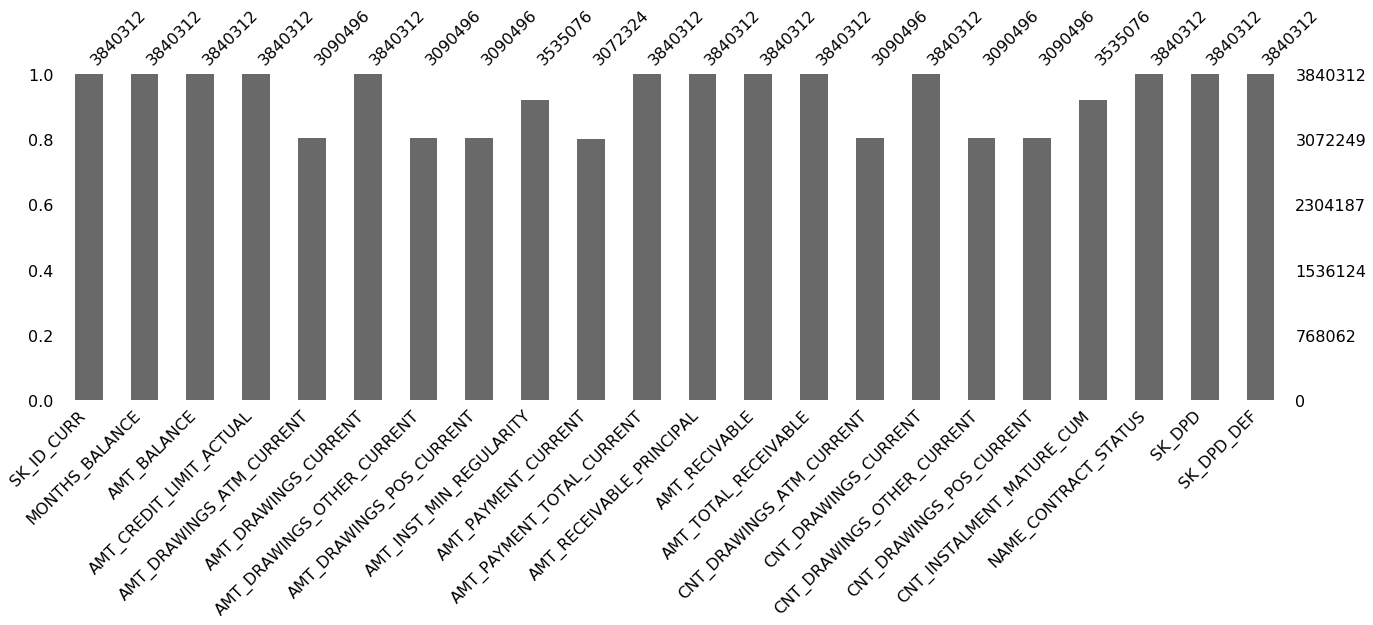

In [122]:
mn.bar(dfa1,figsize=(22,6))

In [120]:
dfa2 = pd.read_csv('installments_payments.csv', index_col=0)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/lib/arraysetops.py:518: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [121]:
dfa2.shape

(13605401, 7)

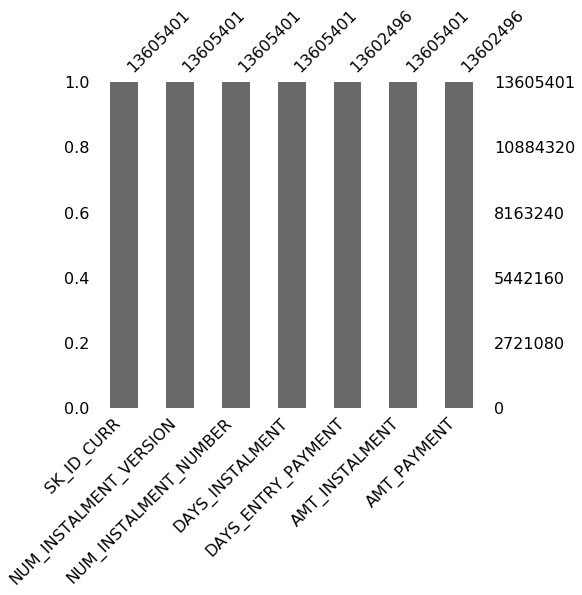

In [123]:
mn.bar(dfa2,figsize=(7,6))

In [132]:
#dfr= pd.concat([df40, dfa1], axis=1, join='inner')
dfr = pd.merge(df40, dfa1, on=['SK_ID_CURR', 'SK_ID_CURR'])

In [ ]:
dfr = 

In [133]:
dfr.shape

(3227965, 62)

In [ ]:
dfa2.shape